In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# read the data
df = pd.read_csv('dataset.csv')

In [3]:
#drop irrelevant columns
cols_to_drop=['RANDID','educ','TIMECVD','TIME','PERIOD','HDLC','LDLC','ANGINA','HOSPMI', 'MI_FCHD', 'ANYCHD','STROKE','HYPERTEN', 'DEATH','TIMEAP','TIMEMI', 'TIMEMIFC','TIMECHD', 'TIMESTRK', 'TIMEHYP','TIMEDTH']
df=df.drop(cols_to_drop, axis=1) #axis=1 because we are dropping columns, not rows

In [4]:
# not many so we can drop them all
df=df.dropna()# drop the observations that contain missing values
df.isnull().sum().sum() # print number of rows with missing values after dropping the rows

0

In [5]:
dfIQR=df[['TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE']]

In [6]:
Q1 = dfIQR.quantile(0.25)
Q3 = dfIQR.quantile(0.75)
IQR = Q3-Q1

In [7]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-7-710251c414c6>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-7-710251c414c6>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(8360, 18)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
x = df.iloc[:, :-1] # independent variables
y = df.iloc[:, -1] # dependent variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 0)

In [33]:
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [34]:
import numpy as np
cov_mat=np.cov(x_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[3.16886908 2.20405838 1.8563547  0.07339751 0.19475495 0.2128499
 0.38393112 1.20762054 0.59670527 0.63602944 0.70184226 1.11718627
 1.07831307 0.79751829 0.8919256  0.94973849 0.93144737]


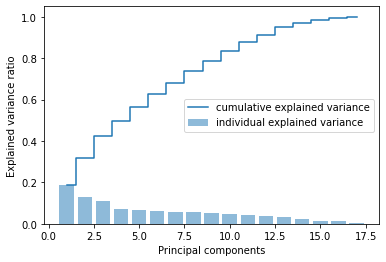

In [35]:
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp=np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,18), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18),cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

The first principal component alone stands for about 20% of variance (information).